In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pip install plotly

     |████████████████████████████████| 23.9 MB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px

In [7]:
df = pd.read_excel('mic.xlsx',
                   engine = 'openpyxl'
                  )
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31 - 40,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,"vanilla, lemon, and mint",Chocolate,More than one flavoured,agree,agree
1,21 - 30,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quanity issues,"vanilla, chocolate, and strawberry",Chocolate,More than one flavoured,neutral,neutral
2,41 - 50,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,"vanilla, chocolate, and strawberry",Caramel,More than one flavoured,disagree,neutral
3,21 - 30,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,"vanilla, chocolate, and strawberry",Strawbery,More than one flavoured,agree,agree
4,21 - 30,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,"vanilla, chocolate, and strawberry",Vanila,single flavoured,agree,Strongly agree


In [69]:
counts = df ['Age'].value_counts()
counts 

type(counts)

counts= counts.to_frame()
type(counts)
counts

,Age
21 - 30,37
<=20,6
31 - 40,4
41 - 50,3


In [70]:
counts.loc[:,'Age']
counts.loc[:,'Age'].sum(axis = 0)
counts['Total%']= (counts.loc[:,'Age'])/counts.loc[:,'Age'].sum(axis = 0)*100
counts

,Age,Total%
21 - 30,37,74.0
<=20,6,12.0
31 - 40,4,8.0
41 - 50,3,6.0


In [71]:
counts.reset_index(inplace = True)
counts.rename({"index": 'Age_group'},
              axis = 1,
              inplace = True)
counts

,Age_group,Age,Total%
0,21 - 30,37,74.0
1,<=20,6,12.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


In [72]:
x = list(counts['Age_group'])
y = list(counts ['Total%'])

In [73]:
type (x)
mpl.style.use('ggplot')

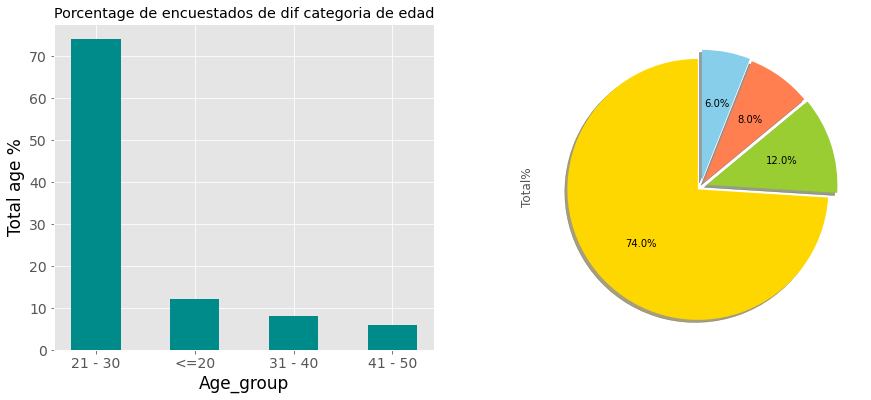

In [74]:
plt.subplot(1,2,1)
plt.rcParams['figure.figsize']= (15,7)
plt.bar(x,y,
       width = 0.5,
       color = 'darkcyan')

plt.xlabel('Age_group',fontweight = 'regular',color = 'black',
          fontsize = 17, horizontalalignment = 'center')
plt.ylabel('Total age %',fontweight = 'regular',color = 'black',
           fontsize = 17, horizontalalignment = 'center')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Porcentage de encuestados de dif categoria de edad')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize'] = (15,7)
fav_colors = ['gold','yellowgreen','coral','skyblue', 'pink','lightgreen']
exp_distance = [0.03,0.05,0.04,0.05]

counts['Total%'].plot(kind = 'pie',
                      figsize =(15,6),
                      autopct = '%1.1f%%',
                      colors = fav_colors,
                      startangle = 90,
                      labels = None,
                      explode = exp_distance,
                      shadow = True,
                     )


In [78]:
df['Age'].value_counts()

21 - 30    37
<=20        6
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [79]:
df.columns

Index(['Age', 'Sex', 'Ocupation', 'Monthly income ', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'reason', 'Popular ', 'My favorite',
       'Kind', 'Preference', 'Recommend'],
      dtype='object')

In [85]:
df
df.groupby(['Age','Sex']).size()

Age      Sex   
21 - 30  Female    15
         Male      22
31 - 40  Female     2
         Male       2
41 - 50  Female     2
         Male       1
<=20     Female     3
         Male       3
dtype: int64